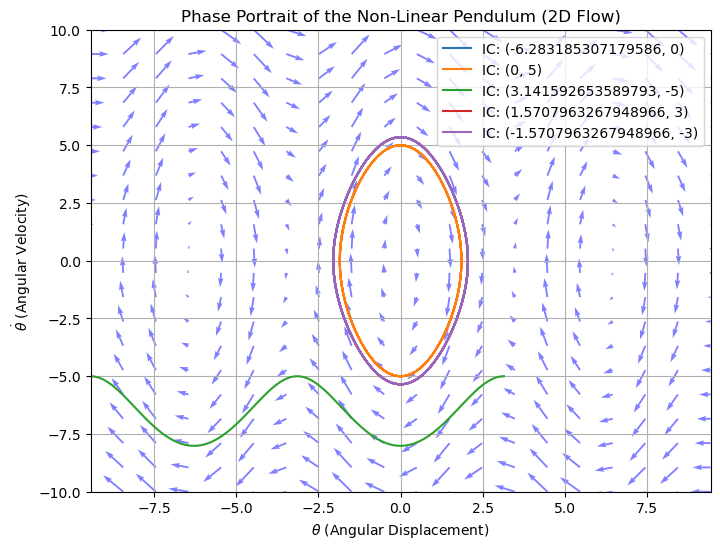

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters for the pendulum system
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of the pendulum (m)

# Define the system of first-order equations for the non-linear pendulum
def pendulum_flow(x, t, g, L):
    theta, omega = x
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Create a grid of points to evaluate the flow directions
theta_vals = np.linspace(-3 * np.pi, 3 * np.pi, 20)
omega_vals = np.linspace(-10, 10, 20)
Theta, Omega = np.meshgrid(theta_vals, omega_vals)

# Compute the flow directions at each point
U = Omega
V = -(g/L) * np.sin(Theta)

# Initial conditions for characteristic curves
initial_conditions = [(-2*np.pi, 0), (0, 5), (np.pi, -5), (np.pi/2, 3), (-np.pi/2, -3)]

# Time points for integration
t = np.linspace(0, 10, 500)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.quiver(Theta, Omega, U, V, color='blue', alpha=0.5)

# Plot characteristic curves
for ic in initial_conditions:
    sol = odeint(pendulum_flow, ic, t, args=(g, L))
    plt.plot(sol[:, 0], sol[:, 1], label=f'IC: {ic}')

plt.title('Phase Portrait of the Non-Linear Pendulum (2D Flow)')
plt.xlabel(r'$\theta$ (Angular Displacement)')
plt.ylabel(r'$\dot{\theta}$ (Angular Velocity)')
plt.xlim([-3 * np.pi, 3 * np.pi])
plt.ylim([-10, 10])
plt.grid(True)
plt.legend()
plt.show()
